# Netflix ratings analysis

## Introduction
This project aims to analyse the ratings of Netflix movies and TV shows.
### Dataset 
The dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc. as of mid 2021.
https://www.kaggle.com/datasets/shivamb/netflix-shows

### Importing required libraries

In [263]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### Loading data

In [264]:
try:
    df = pd.read_csv("netflix_titles.csv")
    if df.empty:
        raise ValueError("Loaded empty DataFrame")
    else:
        print("Data Loaded successfully")
except FileNotFoundError:
    print("File 'netflix_titles.csv' not found")
except Exception as e:
    print(f"[ERROR] An unexpected error occurred: {type(e).__name__}: {e}")

Data Loaded successfully


### Data Overview

In [265]:
print(f"Total columns:\t{df.shape[1]}")
print(f"Total rows:\t{df.shape[0]}")
print(f"Column names:\n{list(df.columns)}")


df.info()
display(df.head(2))
display(df.tail(2))

Total columns:	12
Total rows:	8807
Column names:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


### Data information:
There are total 12 columns.  
Issues found  
missing values in mulitple columns.  
3 in duration  
4 in ratings  
10 in date_added  
over 800 in cast  
over 800 in country  
over 2500 in director
date_added is object type.


### Data Cleaning
First convert wrong data types into correct usable ones (e.g. 'duration' from string to time, 'rating' from string to float)

Backup the original dataset before transformations

In [266]:
# Duplicate dataframe for recovery
dff = df.copy() 

In [267]:
# column wise cleaning

# standardize capitalization
df['type'] = df['type'].str.strip().str.title()

# removing extra whitespace
df['title'] = df['title'].str.strip() 

# Fill empty cells with Unknown
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")

# convert from string to datetime
# leave inavlid/empty dates as NaT
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')



# fill 'Unknown' to empty cells, remove blank space, and convert to upper case
df['rating'] = df['rating'].fillna('Unknown').str.strip().str.upper()

# Replace rare rating categories (frequency < 10) with 'Other'

rating_count = df['rating'].value_counts()
rare_rating_count = rating_count[rating_count < 10]
rare_rating_categories = rare_rating_count.index
df['rating'] = df['rating'].replace(rare_rating_categories, 'Other')
df['rating'].value_counts()
# since there were only 4 'UNKNOWN' values they were replaced with Other



rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
G          41
Other      19
Name: count, dtype: int64

In [268]:
# clean remaining columns - duration, listed_in, description
# duration column has 'x min' for movies and 'x seasons' for TV shows
# create two new columns seaparating them 'duration_time' and 'duration_type' 

# using column wise sending

def extract_time(x):
    try:
        if pd.isna(x):
            return np.nan
        return int(x.strip().split()[0])
    except Exception:
        return np.nan
    
def extract_type(x):
    try:
        if pd.isna(x):
            return np.nan
        else:
            return x.strip().split()[1]
    except Exception:
        return np.nan
    
df['duration_time'] = df['duration'].apply(extract_time)
df['duration_type'] = df['duration'].apply(extract_type)
df.head(2)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_time,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,Tv Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons


In [269]:
# row-wise sending row
# creating colums 'duration_time' and 'duration_type' 
"""def extract_time(row):
    try:
        if pd.isna(row['duration']):
            return np.nan
        else:
            return int(row['duration'].strip().split()[0])
    except Exception:
        return np.nan
    
def extract_duration(row):
    try:
        if pd.isna(row['duration']):
            return np.nan
        else:
            return row['duration'].strip().split()[1]
    except Exception:
        return np.nan

df['duration_time'] = df.apply(extract_time, axis=1)
df['duration_type'] = df.apply(extract_duration, axis=1)"""



"def extract_time(row):\n    try:\n        if pd.isna(row['duration']):\n            return np.nan\n        else:\n            return int(row['duration'].strip().split()[0])\n    except Exception:\n        return np.nan\n    \ndef extract_duration(row):\n    try:\n        if pd.isna(row['duration']):\n            return np.nan\n        else:\n            return row['duration'].strip().split()[1]\n    except Exception:\n        return np.nan\n\ndf['duration_time'] = df.apply(extract_time, axis=1)\ndf['duration_type'] = df.apply(extract_duration, axis=1)"

In [270]:
# Standardize duration units 
# convert mins to min and seasons to season
df['duration_type'] = df['duration_type'].replace({
    'mins': 'min',
    'Seasons': 'Season',
    'seasons': 'Season'
})


df['listed_in'] = df['listed_in'].str.strip()
# df['listed_in'] = df['listed_in'].apply(lambda x: ', '.join(i.strip() for i in x.split(',')) if pd.notna(x) else x)

df['description'] = df['description'].str.strip()


In [271]:
# remove duplicates
df.drop_duplicates(inplace=True)
df.drop_duplicates(subset=['title'], inplace=True)
df.drop_duplicates(subset='show_id', inplace=True)
df.reset_index(drop=True, inplace=True) #drop used to drop old index


### Save cleaned data into new csv file 'netflix_cleaned.csv'

In [272]:
df.to_csv("netflix_cleaned.csv")

## Analysis

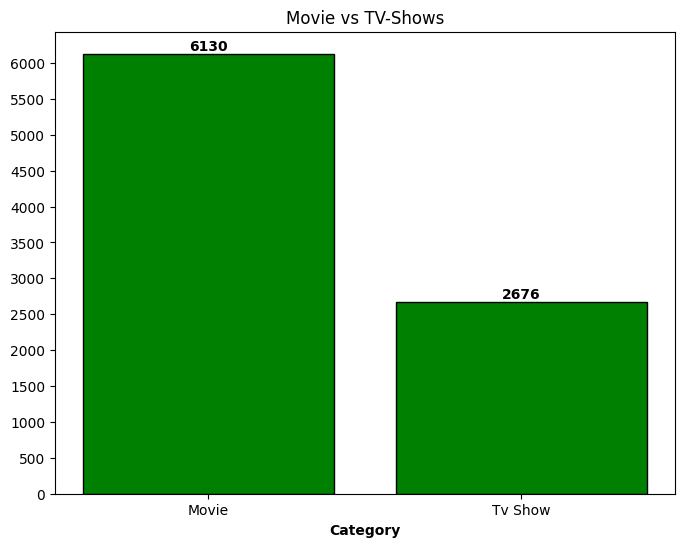

In [273]:
# Movie vs Tv-shows count
def count_using_seaborn():

    plt.figure(figsize=(8,6))
    ax = sns.countplot(data=df, x='type', color='yellow', edgecolor='black')
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height+0.10, 
                str(height),
                ha='center',
                va='bottom',
                fontweight='bold')
    plt.title("Movie vs TV-Shows")
    plt.xlabel("Category")
    plt.show()


def count_using_matplotlib():
    type_count = df['type'].value_counts()
    ls = np.arange(0, type_count.values.max(), 500)
    plt.figure(figsize=(8,6))
    bars = plt.bar(type_count.index, type_count.values, color='green', edgecolor='black')
    
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2, height+10, 
                str(height), 
                ha='center',
                va='bottom', 
                fontweight='bold'
                )
    
    plt.yticks(ls)
    plt.title("Movie vs TV-Shows")
    plt.xlabel("Category", fontdict={'fontweight':'bold'})
    plt.show()

count_using_matplotlib()
# count_using_seaborn()

0                                        Documentaries
1      International TV Shows, TV Dramas, TV Mysteries
2    Crime TV Shows, International TV Shows, TV Act...
3                               Docuseries, Reality TV
4    International TV Shows, Romantic TV Shows, TV ...
Name: listed_in, dtype: object

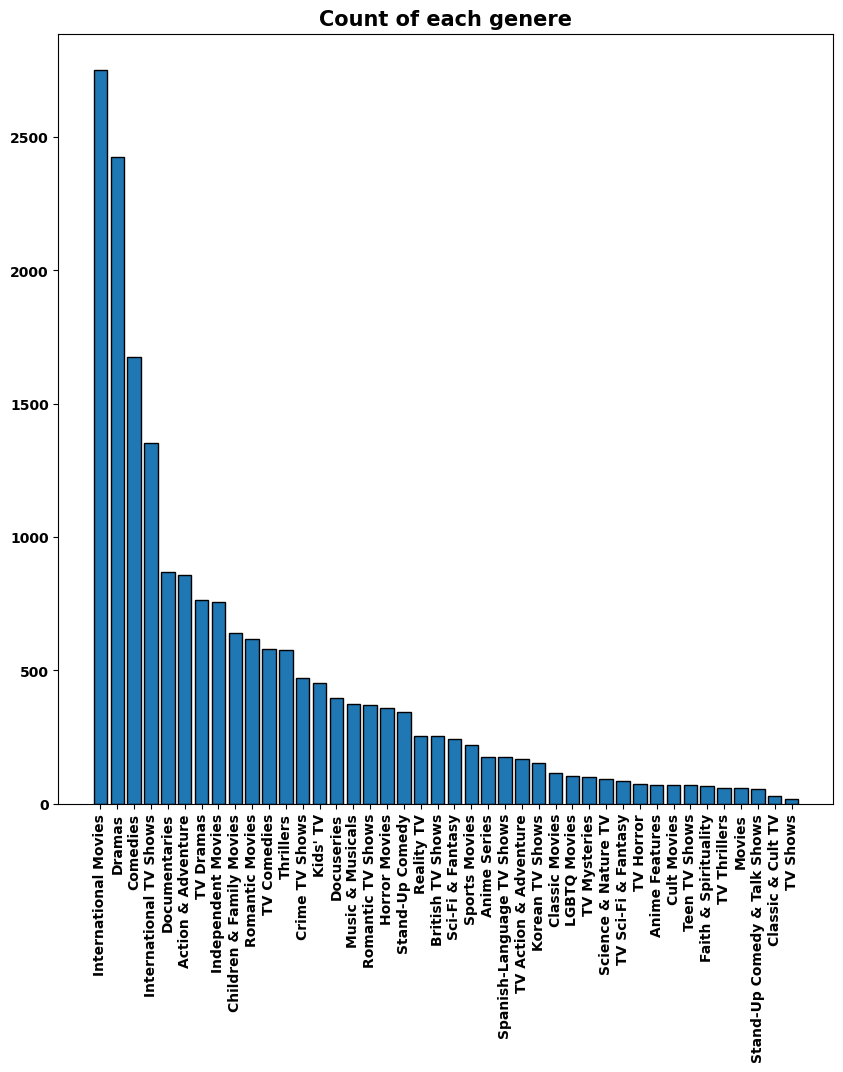

In [274]:
# Genere distribution
display(df['listed_in'].head(5))
# cells in df['listed_in' can have more than 1 genere seaprated by ','
# split each cell's item by ',' 
# and remove extra blsnkspace

all_genre = []
all_genre = [g.strip() for item in df['listed_in'] for g in item.split(',') ]

# or in simplere way

# all_genre = []
# for item in df['listed_in']:
#     genres = item.split(',')          # Split the string into a list of genres
#     for g in genres:
#         all_genre.append(g.strip())   # Strip spaces and append to final list


all_genre
all_genre_count = pd.Series(all_genre).value_counts()
all_genre_count


plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
plt.title("Count of each genere", fontsize=15, fontweight='bold')
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')

plt.bar(all_genre_count.index, all_genre_count.values, edgecolor='black')
# plt.barh( all_genre_count.index, all_genre_count.values)
# sns.countplot(data=flat_genres, order=order)
plt.show()

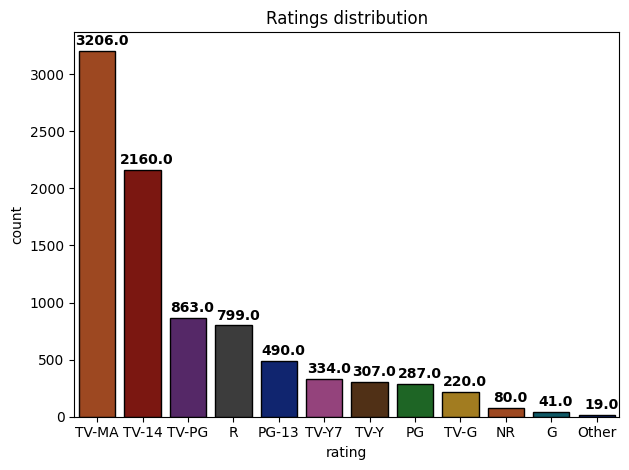

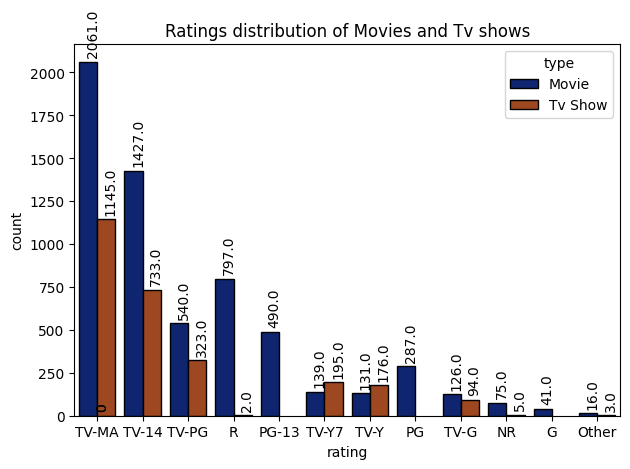

In [275]:
# Ratings Distribution

def plot_ratings_distribution(category):
    if category=='separate':
        ax = sns.countplot(data=df, x='rating'
              ,order=df['rating'].value_counts().index,
              edgecolor='black',
              hue='type',
              palette='dark')
    else :
        ax = sns.countplot(data=df,
              x='rating',
              order=df['rating'].value_counts().index,
              color='green',
              edgecolor='black',
              hue='rating', # added hue for using palette
              palette='dark')
    for bar in ax.patches:
        height = bar.get_height()
        x = bar.get_x() + bar.get_width()/2 + 0.1 # extra 0.1 for better eadability
        y = height + 25
        if category=='separate': # rotate annotaion by 90
            ax.text(x,y, str(height), ha='center', va='bottom', rotation = 90)
        else: # do not rotate annotation
            ax.text(x,y, str(height), ha='center', va='bottom', fontweight='bold')


    if category=='separate': # rotate annotaion by 90
        plt.title("Ratings distribution of Movies and Tv shows")
    else:
        plt.title("Ratings distribution")
    plt.tight_layout()
    plt.show()

plot_ratings_distribution(None) # Combined ratings in green
plot_ratings_distribution('separate') # Separate bars by 'type'


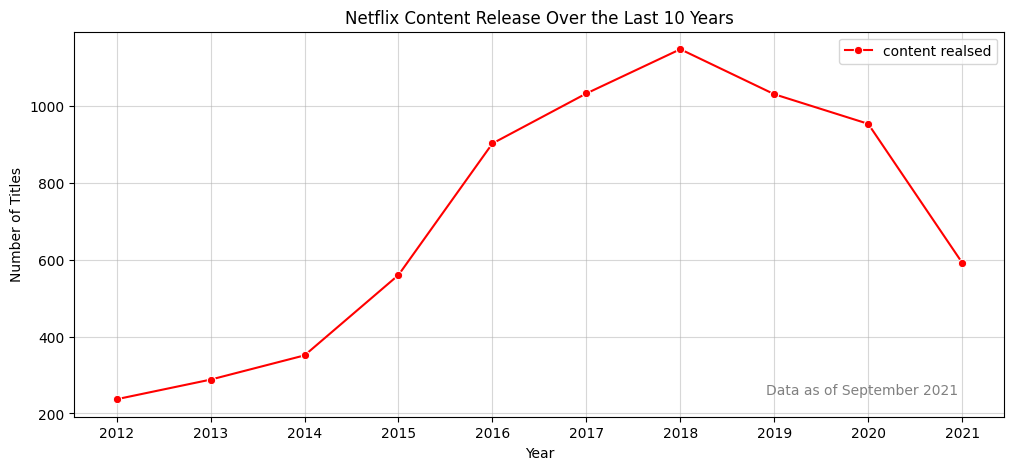

In [276]:
# content realsed by Netflix in last n years
def plot_content_releases(last_n_years=10):
    total_content_per_year = df['release_year'].value_counts()
    data = total_content_per_year.sort_index(ascending=False).head(last_n_years)
    # display(data)
    plt.figure(figsize=(12, 5))
    sns.lineplot(x=data.index, y=data.values, marker='o', color='red', label="content realsed")
    plt.title(f"Netflix Content Release Over the Last {last_n_years} Years")
    plt.xlabel("Year")
    plt.ylabel("Number of Titles")
    plt.grid(True, alpha=0.5)
    
    max_year = data.index.max()
    min_year = data.index.min()
    plt.xticks(np.arange(min_year, max_year+1, 1))

    
    
    plt.annotate(
        f"Data as of September 2021",
        xy=(0.95, 0.05),
        xycoords='axes fraction',
        # xycoords='figure fraction',

        ha='right',
        va='bottom',
        fontsize=10,
        color='gray'
    )
    
    plt.show()

n_years = 10 # last n years of data
plot_content_releases(n_years)

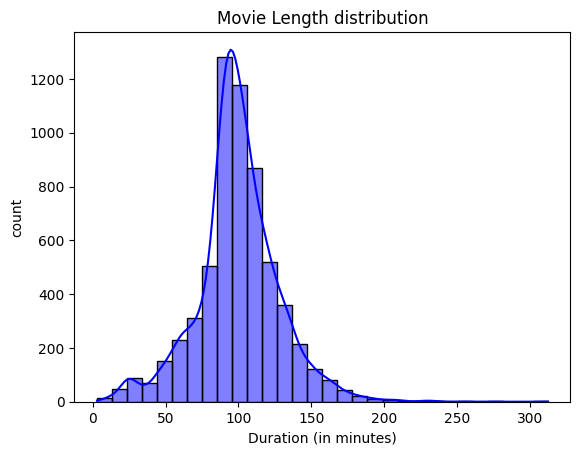

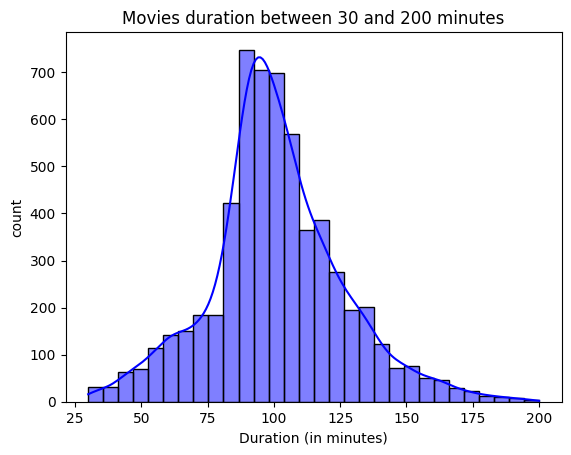

In [277]:
# Movie length distribution
df_movies = df[df["type"] == 'Movie'].copy()
df_movies = df_movies[df_movies['duration_time'].notna()]

# Make sure duration_time is float (if not already)
df_movies['duration_time'] = df_movies['duration_time'].astype(float)


# confirm duration to be float
# df_movies.info()
def all_movies():
    
    sns.histplot(df_movies['duration_time'], bins=30, kde=True, color='blue', edgecolor='black')
    plt.xlabel("Duration (in minutes)")
    plt.ylabel('count')
    plt.title("Movie Length distribution")
    plt.show()

def movie_length_x_y(min_time=30, max_time=200):
    
    filtered = df_movies[(df_movies['duration_time']>=min_time) & (df_movies['duration_time']<=max_time)]
    
    sns.histplot(filtered['duration_time'], bins=30, kde=True, color='blue', edgecolor='black')
    
    plt.title(f"Movies duration between {min_time} and {max_time} minutes")
    plt.xlabel("Duration (in minutes)")
    plt.ylabel('count')
    plt.show()
all_movies()
movie_length_x_y(min_time=30,max_time=200)

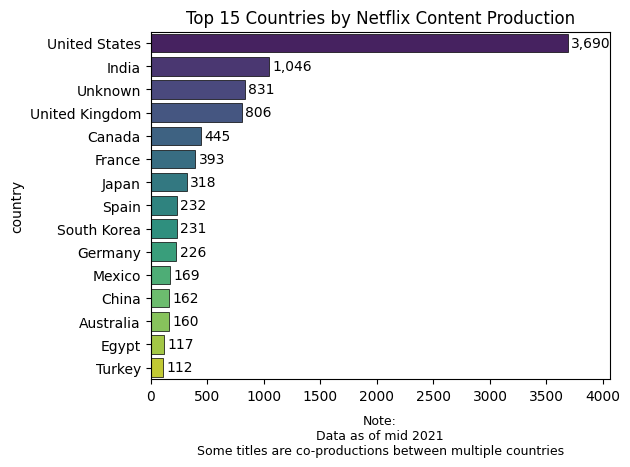

In [278]:
# Top content producing countires

df_country = df['country'].dropna() # drop rows wiht no country
# since a cell can contain multiple countres separated by ','
# split each string into a list of countries
df_country = df_country.apply(lambda x: x.split(','))

# remove blank spaces from each country name in list
df_country = df_country.apply(lambda x: [item.strip() for item in x])

# Flatten the list
df_country = df_country.explode()

df_country = df_country.value_counts().head(15) # select only top 15


ax = sns.barplot(
        x=df_country.values,
        y=df_country.index,
        hue=df_country.index,  # Assign hue same as y to us palette
        palette='viridis',
        edgecolor='black',
        linewidth=0.5,
    )
plt.title("Top 15 Countries by Netflix Content Production")

# Add value labels
for i, value in enumerate(df_country.values):
    ax.text(value + 30, i, f'{value:,}', va='center', fontsize=10)

plt.annotate("Note:\nData as of mid 2021\nSome titles are co-productions between multiple countries",
            xy=(0.5, -0.1),
            xycoords='axes fraction',
            ha='center',
            va='top',
            fontsize=9)
plt.xlim(0, df_country.max() * 1.1)  # Add padding for labels
plt.tight_layout()
plt.show()

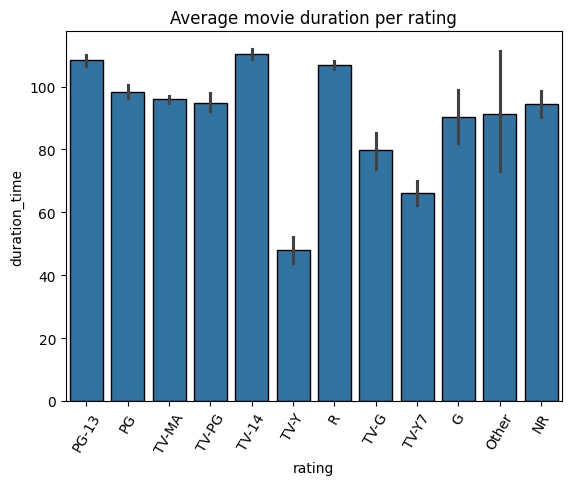

In [279]:
# Average movie duration per rating

sns.barplot( x=df_movies['rating'], y=df_movies['duration_time'], estimator='mean', edgecolor='black')
plt.xticks(rotation=60)
plt.title("Average movie duration per rating")
plt.show()